In [1]:
# import functions from ../definitions/definitions_EDA
from datetime import datetime, timedelta
import sys
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
sys.path.append('../definitions')
import definitions_EDA as eda
# import definitions_plotting as def_plot
from scipy.fft import fft, ifft, fftfreq
from scipy import signal
import shutil
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


Define Variables

In [2]:
start_date = '2024-03-20'
end_date = '2024-03-21'

Fetch data and store as dataframe (data ingestion)

In [3]:
data_arr_mag = eda.process_data(eda.get_data('ctumag', eda.read_txt_file, start_date, end_date))
data_arr_squid = eda.process_data(eda.get_data('squid', eda.read_txt_file, start_date, end_date))
df = eda.create_dataframe(data_arr_mag, data_arr_squid, start_date)
print(f' Head of dataframe: \n',df.head())
print(f' \n Shape of df', df.shape)
print(f'\nTypes for each column: \n', df.dtypes)

File not found: /Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/DUMMY/2024-03-21.ctumag
File not found: /Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/DUMMY/2024-03-21.squid
 Head of dataframe: 
                          NS_SQUID  F_SQUID  NS_Fluxgate  EW_Fluxgate  \
Time                                                                   
2024-03-20 00:00:00.200   26.8975 -21.3825   10963.7487     -75.1369   
2024-03-20 00:00:00.400   26.8976 -21.3850   10963.7480     -75.0673   
2024-03-20 00:00:00.590   26.8986 -21.3782   10963.7480     -75.0673   
2024-03-20 00:00:00.790   26.8990 -21.3849   10963.7493     -75.0661   
2024-03-20 00:00:00.990   26.9028 -21.3667   10963.7537     -75.0418   

                         Z_Fluxgate  
Time                                 
2024-03-20 00:00:00.200 -22673.3896  
2024-03-20 00:00:00.400 -22673.5228  
2024-03-20 00:

Plot the raw data

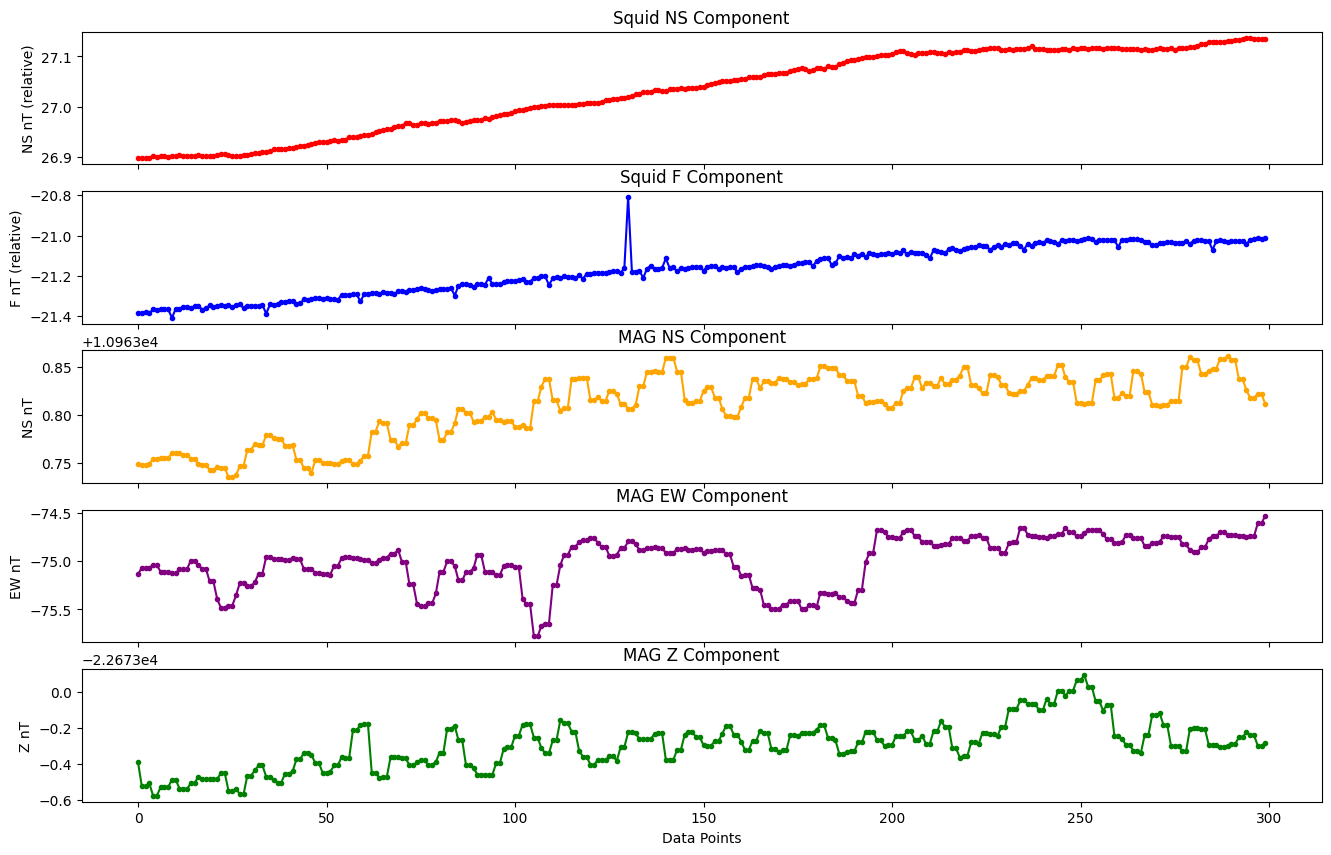

In [4]:
eda.generateDataPlots(df['NS_SQUID'].values, df['F_SQUID'].values, df['NS_Fluxgate'].values, df['EW_Fluxgate'].values, df['Z_Fluxgate'].values, df.shape[0], 300, start_date, end_date)

Check for missing values

In [5]:
for column in df.columns:
    print(f"\n Number of missing values in {column} is: ", df[column].isna().sum())


 Number of missing values in NS_SQUID is:  0

 Number of missing values in F_SQUID is:  0

 Number of missing values in NS_Fluxgate is:  0

 Number of missing values in EW_Fluxgate is:  0

 Number of missing values in Z_Fluxgate is:  0


Outlier check

In [6]:
print(f' \n Shape of df before removing outliers', df.shape)
outliers_removed = eda.remove_outliers(df)
print(f' \n Shape of df after removing outliers', outliers_removed.shape)
# outliers_removed.resample('s').count()

 
 Shape of df before removing outliers (300, 5)
Upper: NS_SQUID          27.329663
F_SQUID          -20.735162
NS_Fluxgate    10963.909437
EW_Fluxgate      -74.284638
Z_Fluxgate    -22672.989650
dtype: float64
Lower: NS_SQUID          26.750363
F_SQUID          -21.593062
NS_Fluxgate    10963.713338
EW_Fluxgate      -75.626337
Z_Fluxgate    -22673.612050
dtype: float64
Index of removed values: DatetimeIndex(['2024-03-20 00:00:21.190000', '2024-03-20 00:00:21.390000',
               '2024-03-20 00:00:21.590000', '2024-03-20 00:00:21.790000',
               '2024-03-20 00:00:21.990000', '2024-03-20 00:00:49.990000',
               '2024-03-20 00:00:50.190000', '2024-03-20 00:00:50.390000',
               '2024-03-20 00:00:50.590000', '2024-03-20 00:00:50.790000'],
              dtype='datetime64[ns]', name='Time', freq=None)
 
 Shape of df after removing outliers (290, 5)


Plot after outlier removed

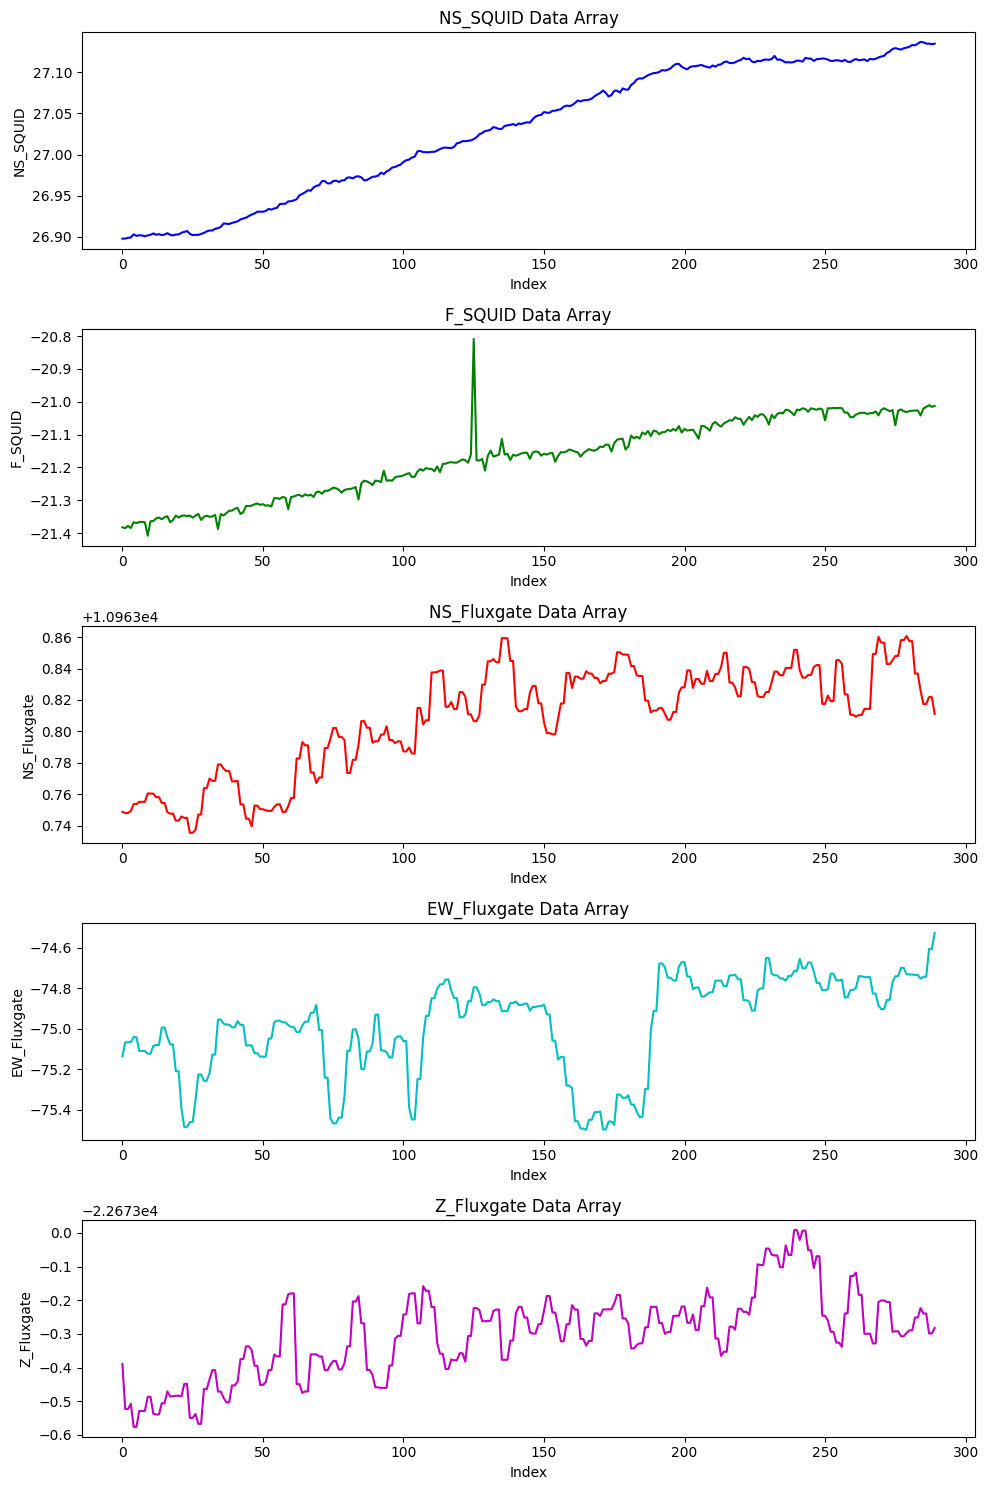

In [7]:
eda.plot_cleaned_data(outliers_removed)

Resampling

In [8]:
outliers_removed.resample('s').count()


,NS_SQUID,F_SQUID,NS_Fluxgate,EW_Fluxgate,Z_Fluxgate
Time,,,,,
2024-03-20 00:00:00,5,5,5,5,5
2024-03-20 00:00:01,5,5,5,5,5
2024-03-20 00:00:02,5,5,5,5,5
2024-03-20 00:00:03,5,5,5,5,5
2024-03-20 00:00:04,5,5,5,5,5
2024-03-20 00:00:05,5,5,5,5,5
2024-03-20 00:00:06,5,5,5,5,5
2024-03-20 00:00:07,5,5,5,5,5
2024-03-20 00:00:08,5,5,5,5,5


Number of dropped rows: NS_SQUID       2
F_SQUID        2
NS_Fluxgate    2
EW_Fluxgate    2
Z_Fluxgate     2
dtype: int64
This is the length of the resampled data frame 58


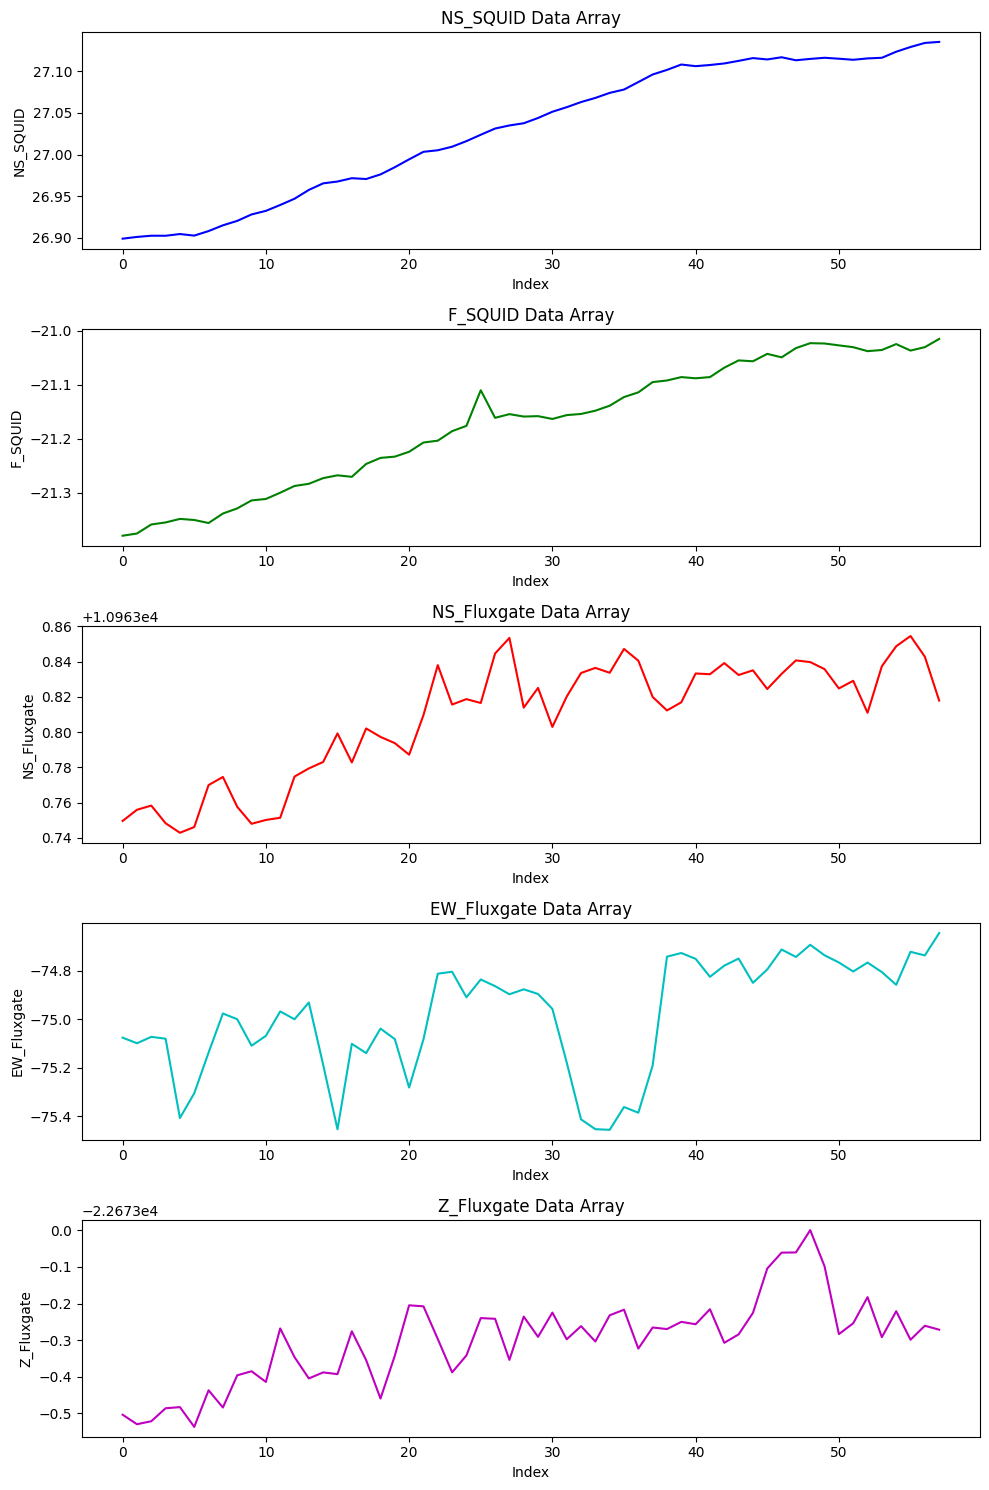

                      NS_SQUID    F_SQUID   NS_Fluxgate  EW_Fluxgate  \
Time                                                                   
2024-03-20 00:00:00  26.899100 -21.379460  10963.749540   -75.075880   
2024-03-20 00:00:01  26.901180 -21.375360  10963.755880   -75.098940   
2024-03-20 00:00:02  26.902640 -21.358640  10963.758260   -75.072600   
2024-03-20 00:00:03  26.902600 -21.354860  10963.748240   -75.080160   
2024-03-20 00:00:04  26.904660 -21.348320  10963.742820   -75.406460   
2024-03-20 00:00:05  26.902780 -21.350300  10963.746080   -75.304760   
2024-03-20 00:00:06  26.908220 -21.355940  10963.769920   -75.137280   
2024-03-20 00:00:07  26.915120 -21.338380  10963.774520   -74.976440   
2024-03-20 00:00:08  26.920460 -21.328900  10963.757580   -75.000020   
2024-03-20 00:00:09  26.928180 -21.314080  10963.747920   -75.108860   
2024-03-20 00:00:10  26.932480 -21.311400  10963.750100   -75.068520   
2024-03-20 00:00:11  26.939540 -21.299840  10963.751340   -74.96

In [9]:
resampled_df = eda.resample_data(outliers_removed, 's')

# Print the length of the resampled dataframe
print(f'This is the length of the resampled data frame', len(resampled_df))
# eda.generateDataPlots(resampled_df['NS_SQUID'].values, resampled_df['F_SQUID'].values, resampled_df['NS_Fluxgate'].values, resampled_df['EW_Fluxgate'].values, resampled_df['Z_Fluxgate'].values, resampled_df.shape[0], 300, start_date, end_date)
eda.plot_cleaned_data(resampled_df)
print(resampled_df)

Test for stationarity

In [10]:
eda.perform_dickey_fuller_test(resampled_df)

Dickey-Fuller Test for NS_SQUID:
Test Statistic: -3.046909647152648
p-value: 0.030739835691537848
Lags Used: 5
Number of Observations Used: 52
Critical Values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}
IC Best: -409.1908209078699


Dickey-Fuller Test for F_SQUID:
Test Statistic: -1.5456506650610533
p-value: 0.510820008244958
Lags Used: 1
Number of Observations Used: 56
Critical Values: {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}
IC Best: -261.2038138560844


Dickey-Fuller Test for NS_Fluxgate:
Test Statistic: -1.9097692680456322
p-value: 0.32747938741460403
Lags Used: 6
Number of Observations Used: 51
Critical Values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
IC Best: -269.2003084871459


Dickey-Fuller Test for EW_Fluxgate:
Test Statistic: -2.123050484858571
p-value: 0.2353474587066196
Lags Used: 0
Number of Observations Used: 57
Critical Values: {'1%': -3.5506699942762414,

Test for seasonality and trend

Analyzing column: NS_SQUID


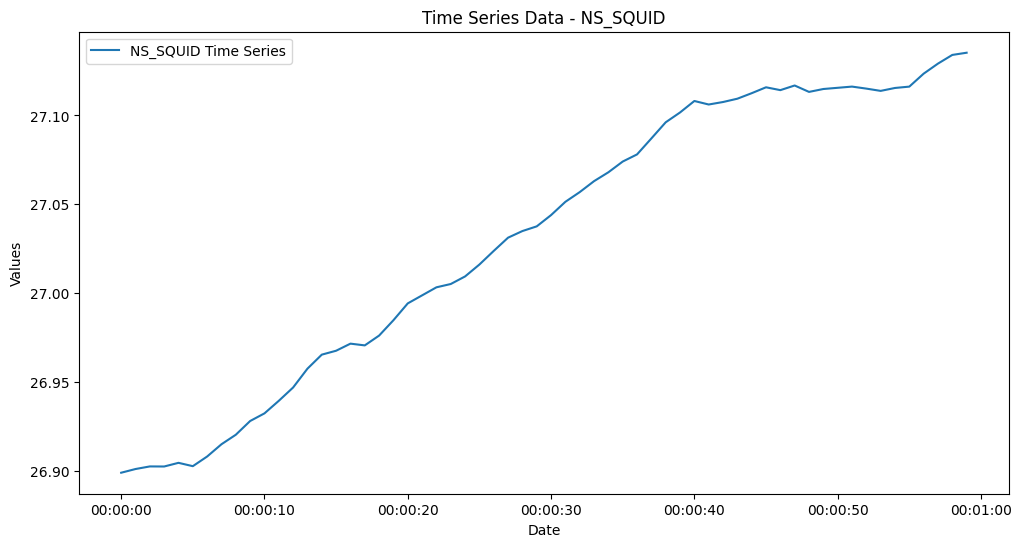

Decomposing the time series for column: NS_SQUID


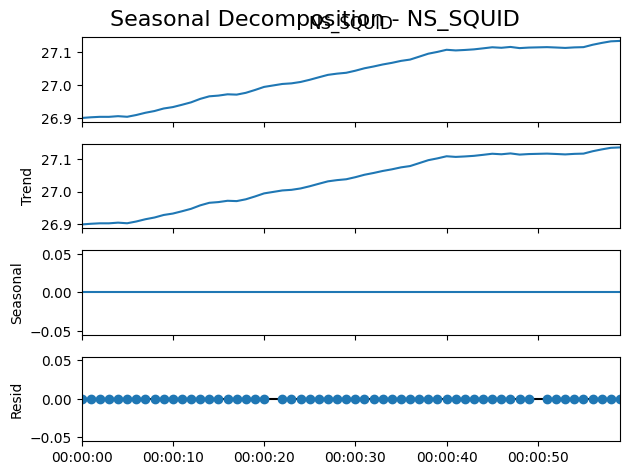

Analyzing column: F_SQUID


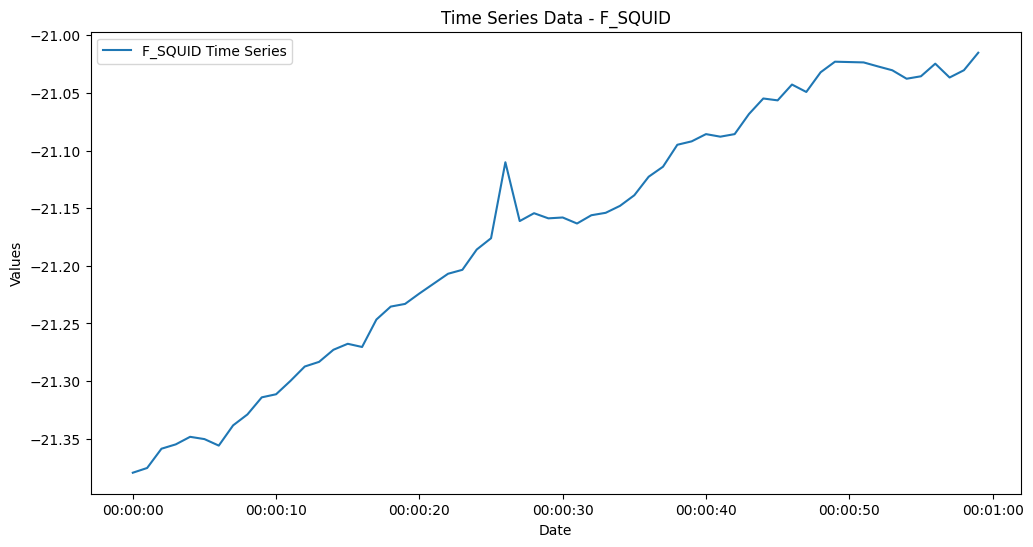

Decomposing the time series for column: F_SQUID


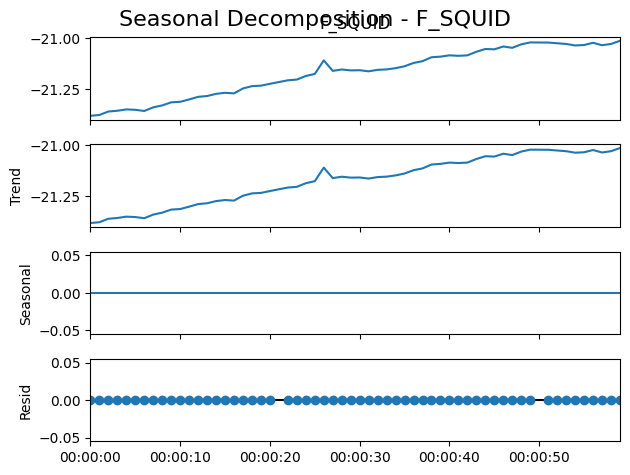

Analyzing column: NS_Fluxgate


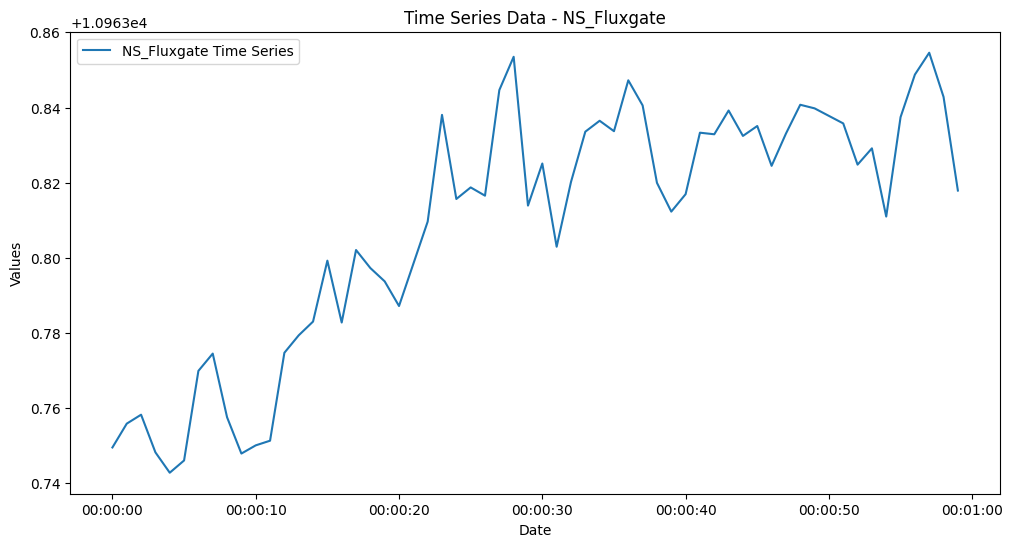

Decomposing the time series for column: NS_Fluxgate


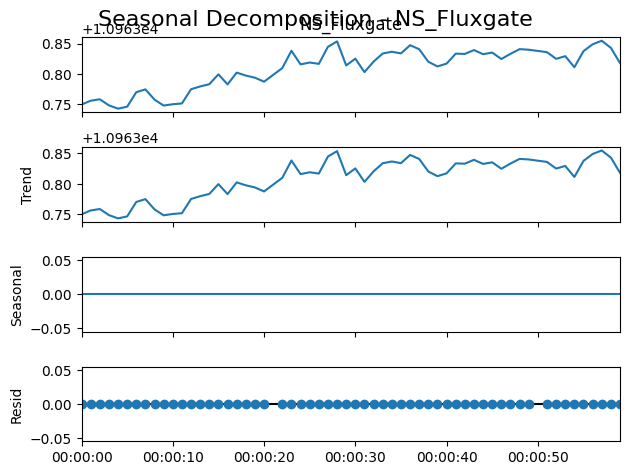

Analyzing column: EW_Fluxgate


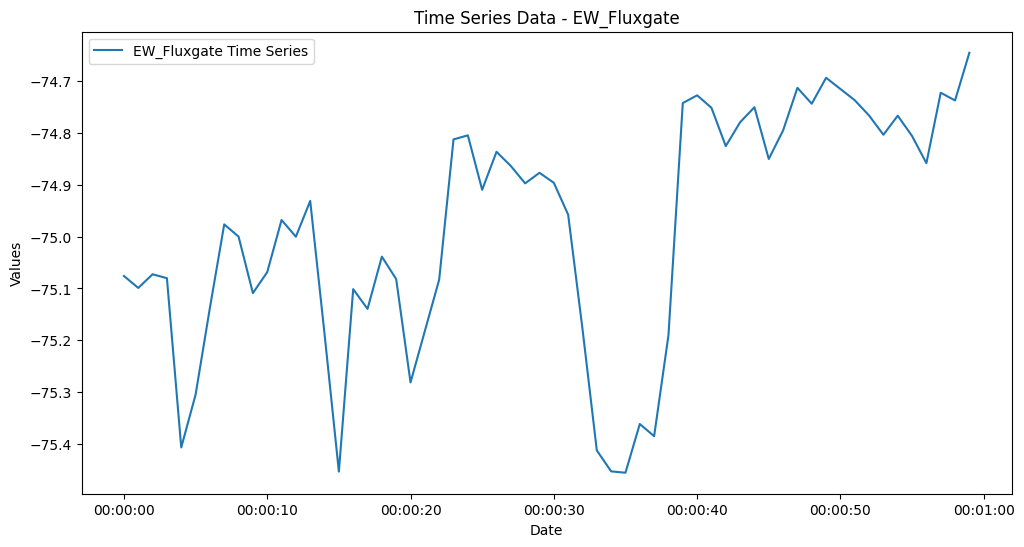

Decomposing the time series for column: EW_Fluxgate


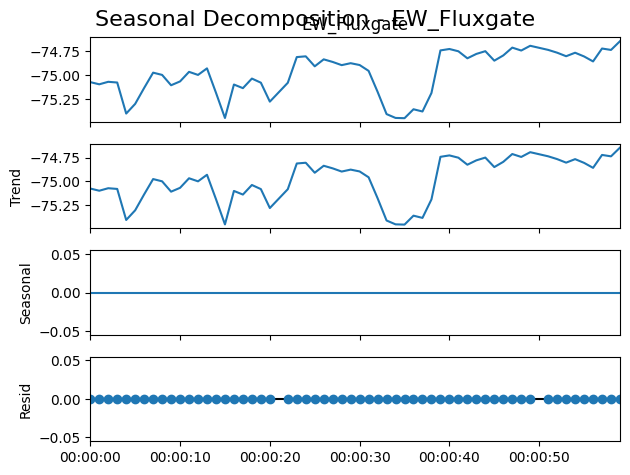

Analyzing column: Z_Fluxgate


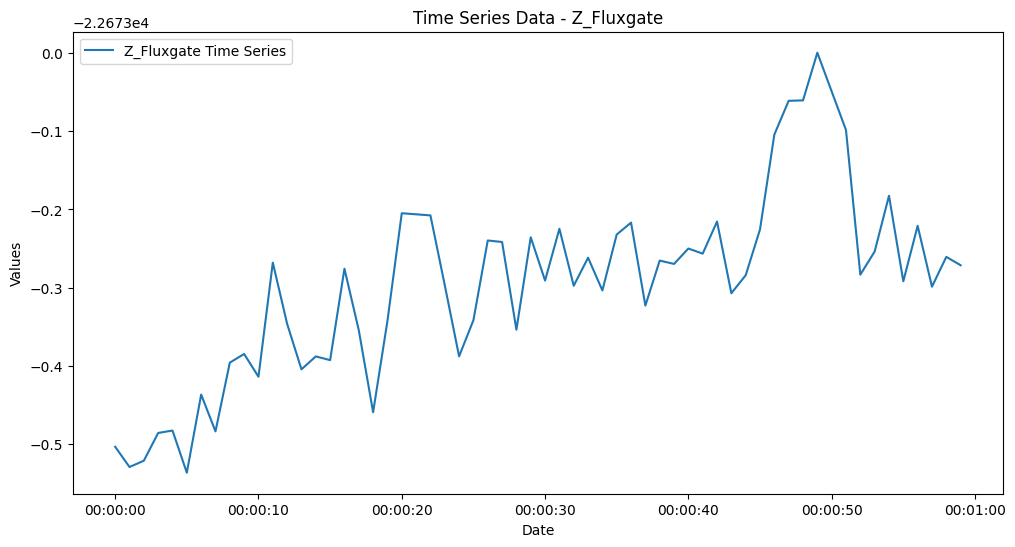

Decomposing the time series for column: Z_Fluxgate


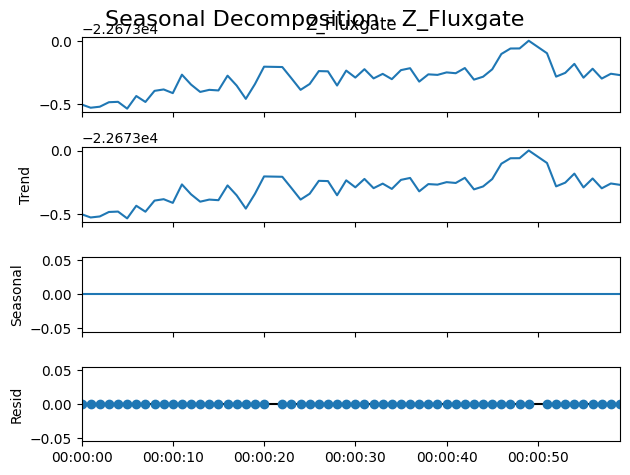

In [11]:
df = resampled_df
eda.test_stationarity(df)


Fourier Transform

In [ ]:
components, fourier_results = eda.calculate_fourier_transforms(df)
eda.plot_fourier_transform(fourier_results, components)